In [2]:
import pyreadstat 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from scipy.stats import poisson, lognorm, pareto, expon, norm
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.mixture import GaussianMixture

In [3]:
file_path = 'r29i_os_73.sav'
df, meta = pyreadstat.read_sav(file_path)

## Отпуск

2792


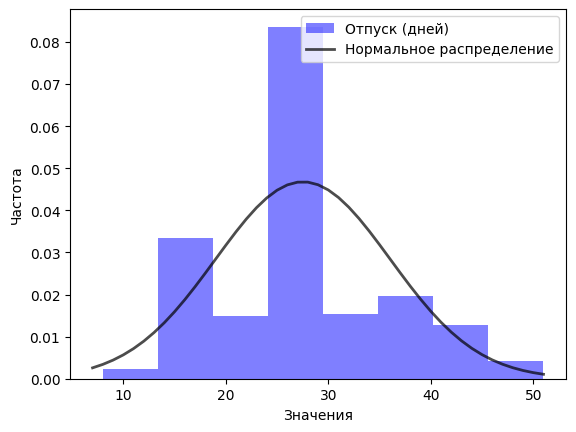

In [ ]:
vac = df['yj21b'].dropna().tolist()
vac=np.array([i for i in vac if 7.5<=i<=51.5]) ####### <- ГРАНИЦЫ ВЫБРОСОВ

μ_hat_vac = np.mean(vac)
σ_hat_vac =np.sqrt(sum([(i-μ_hat_vac)**2 for i in vac])/(len(vac)-1))

plt.hist(vac, bins=8, density=True, alpha=0.5, color='b', label='Отпуск (дней)')
x = np.arange(int(min(vac))-1, int(max(vac))+1 )
pdf = norm.pdf(x, loc=μ_hat_vac, scale=σ_hat_vac)
plt.plot(x, pdf, color='k', linestyle='-', linewidth=2, alpha=0.7, label='Нормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

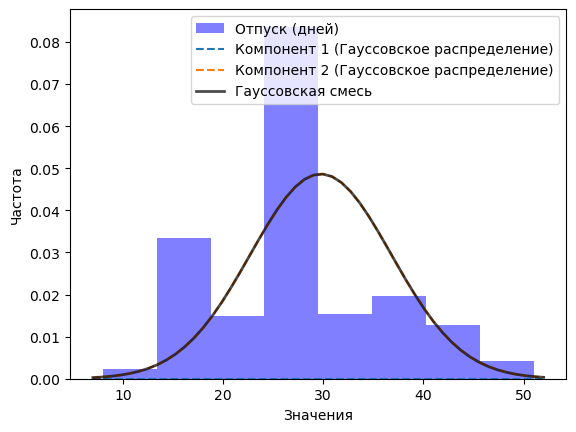

Средние значения: [14.         29.74950379]
Стандартные отклонения: [1.00000000e-03 7.04113167e+00]
Вес компонент: [0.14146565 0.85853435]


In [241]:
'''
vac = df['yj21b'].dropna().tolist()
vac = np.array([i for i in vac if 7.5 <= i <= 51.5]) 

gm = GaussianMixture(n_components=2, random_state=0)
gm.fit(vac.reshape(-1, 1)) 

means = gm.means_.flatten() 
covariances = np.sqrt(gm.covariances_.flatten()) 

plt.hist(vac, bins=8, density=True, alpha=0.5, color='b', label='Отпуск (дней)')

x = np.linspace(min(vac)-1, max(vac)+1)
pdf = np.exp(gm.score_samples(x.reshape(-1, 1))) 

for i in range(2):
    plt.plot(x, gm.weights_[i] * (1 / (covariances[i] * np.sqrt(2 * np.pi))) *
             np.exp(-0.5 * ((x - means[i]) / covariances[i])**2), 
             label=f'Компонент {i+1} (Гауссовское распределение)', linestyle='--')

plt.plot(x, pdf, color='k', linestyle='-', linewidth=2, alpha=0.7, label='Гауссовская смесь')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

print("Средние значения:", means)
print("Стандартные отклонения:", covariances)
print("Вес компонент:", gm.weights_)
'''

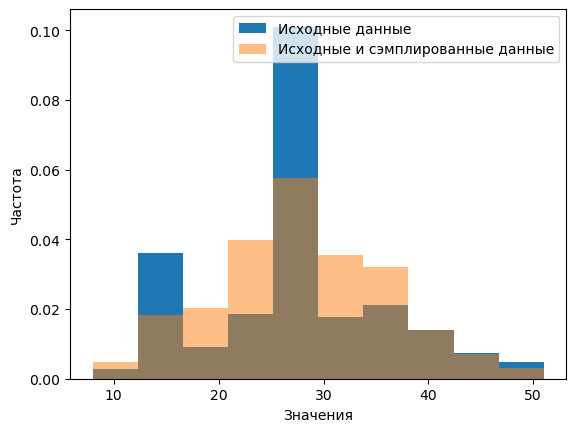

In [238]:
vac2 = np.array(df['yj21b'].tolist())
#vac2[vac2 > 59] = np.nan
vac2[vac2 > 51.5] = 999999999
vac2[vac2 < 7.5] = 999999999

vac2_s = []
v_size=np.sum(np.isnan(vac2))
while len(vac2_s) < v_size:
    samples = np.random.normal(μ_hat_vac, σ_hat_vac, size=100) 
    filtered_samples = samples[(samples >= min(vac[~np.isnan(vac)]) ) & (samples <= max(vac[~np.isnan(vac)]))] 
    vac2_s.extend(filtered_samples[:v_size - len(vac2_s)])  

vac2_s = np.array(vac2_s) 
vac2_s = np.ceil(vac2_s).astype(int) 
vac2[np.isnan(vac2)] = vac2_s

vac3 = vac2[vac2 != 999999999]

plt.hist(vac, density=True, label='Исходные данные')
plt.hist(vac3, density=True, alpha=0.5, label='Исходные и сэмплированные данные')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Рабочая неделя

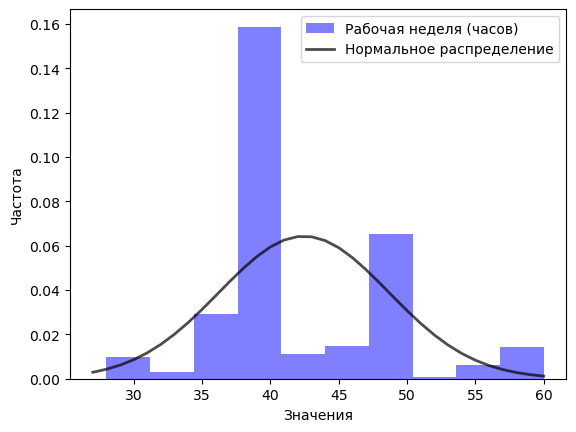

In [242]:
ww = df['yj6.2'].dropna().tolist()
ww=np.array([i for i in ww if i<=60 and i>=28]) ####### <- ГРАНИЦЫ ВЫБРОСОВ

μ_hat_ww = np.mean(ww)
σ_hat_ww =np.sqrt(sum([(i-μ_hat_ww)**2 for i in ww])/(len(ww)-1))

plt.hist(ww, bins=10, density=True, alpha=0.5, color='b', label='Рабочая неделя (часов)')
x = np.arange(int(min(ww))-1, int(max(ww))+1 )
pdf = norm.pdf(x, loc=μ_hat_ww, scale=σ_hat_ww)
plt.plot(x, pdf, color='k', linestyle='-', linewidth=2, alpha=0.7, label='Нормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

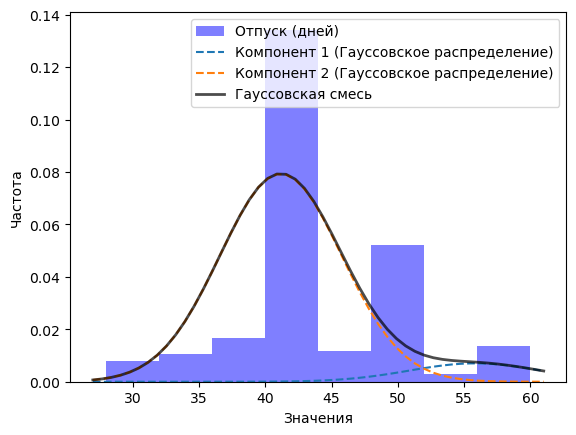

Средние значения: [55.83954023 41.16964539]
Стандартные отклонения: [4.97109324 4.59007332]
Вес компонент: [0.08737536 0.91262464]


In [245]:
#vac = df['yj21b'].dropna().tolist()
#vac = np.array([i for i in vac if 7.5 <= i <= 51.5]) 
'''
ww = df['yj6.2'].dropna().tolist()
ww=np.array([i for i in ww if i<=60 and i>=28]) ####### <- ГРАНИЦЫ ВЫБРОСОВ

vac=ww


gm = GaussianMixture(n_components=2, random_state=0)
gm.fit(vac.reshape(-1, 1)) 

means = gm.means_.flatten() 
covariances = np.sqrt(gm.covariances_.flatten()) 

plt.hist(vac, bins=8, density=True, alpha=0.5, color='b', label='Отпуск (дней)')

x = np.linspace(min(vac)-1, max(vac)+1)
pdf = np.exp(gm.score_samples(x.reshape(-1, 1))) 

for i in range(2):
    plt.plot(x, gm.weights_[i] * (1 / (covariances[i] * np.sqrt(2 * np.pi))) *
             np.exp(-0.5 * ((x - means[i]) / covariances[i])**2), 
             label=f'Компонент {i+1} (Гауссовское распределение)', linestyle='--')

plt.plot(x, pdf, color='k', linestyle='-', linewidth=2, alpha=0.7, label='Гауссовская смесь')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

print("Средние значения:", means)
print("Стандартные отклонения:", covariances)
print("Вес компонент:", gm.weights_)
'''

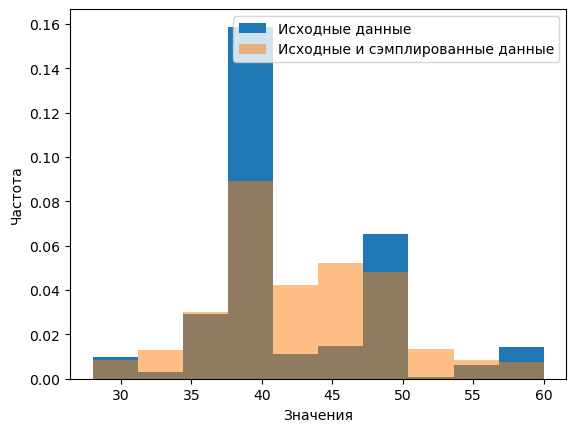

In [212]:
ww2 = np.array(df['yj6.2'].tolist())
ww2[ww2 > 60] = 999999999
ww2[ww2 < 28] = 999999999

ww2_s = []
ww_size=np.sum(np.isnan(ww2))
while len(ww2_s) < ww_size:
    samples = np.random.normal(μ_hat_ww, σ_hat_ww, size=100) 
    filtered_samples = samples[(samples >= min(ww[~np.isnan(ww)]) ) & (samples <= max(ww[~np.isnan(ww)]))] 
    ww2_s.extend(filtered_samples[:ww_size - len(ww2_s)])  

ww2_s = np.array(ww2_s)
ww2_s = np.ceil(ww2_s).astype(int)
ww2[np.isnan(ww2)] = ww2_s

ww3 = ww2[ww2 != 999999999]

plt.hist(ww, density=True, label='Исходные данные')
plt.hist(ww3, density=True, alpha=0.5, label='Исходные и сэмплированные данные')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Премия

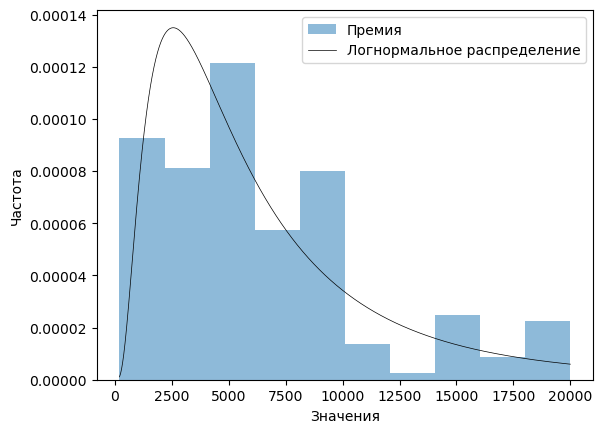

In [213]:
bon = df['yj10.2'].dropna().tolist()
bon = np.array([i for i in bon if i <= 20500 and i>0])
#https://intro.quantecon.org/mle.html

ln_bon = np.log(bon)
μ_hat_bon = np.mean(ln_bon)
num = (ln_bon - μ_hat_bon)**2
σ_hat_bon = (np.mean(num))**(1/2)

dist_lognorm_bon = lognorm(σ_hat_bon, scale = exp(μ_hat_bon))

x = np.arange(int(min(bon))-1, int(max(bon))+1 )
plt.hist(bon, density=True, bins=10, histtype='stepfilled', alpha=0.5,label='Премия')
plt.plot(x, dist_lognorm_bon.pdf(x), 'k-', lw=0.5, label='Логнормальное распределение')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

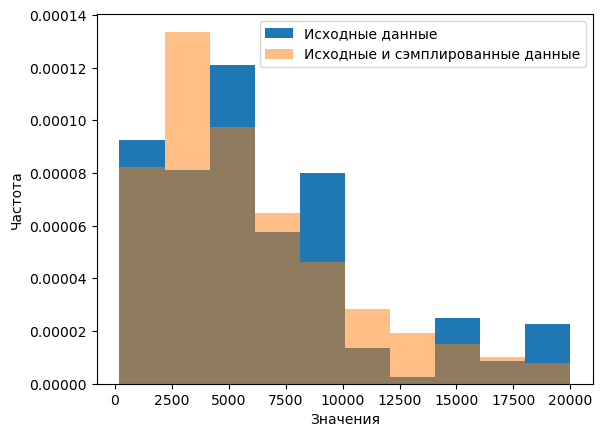

In [214]:
bon2 =np.array(df['yj10.2'].tolist())
bon2[bon2 == 99999996] = np.nan
bon2[bon2 > 20500] = 999999999

bon2_s = []
bon_size=np.sum(np.isnan(bon2))

while len(bon2_s) < bon_size:
    samples = np.random.lognormal(μ_hat_bon,σ_hat_bon, size=100) 
    
    filtered_samples = samples[(samples >= min(bon[~np.isnan(bon)]) ) & (samples <= max(bon[~np.isnan(bon)]))] 
    bon2_s.extend(filtered_samples[:bon_size - len(bon2_s)])  

bon2_s = np.array(bon2_s)
bon2[np.isnan(bon2)] = bon2_s

bon3 = bon2[bon2 != 999999999]

plt.hist(bon, density=True, bins=10,label='Исходные данные')
plt.hist(bon3, density=True, bins=10, alpha=0.5, label='Исходные и сэмплированные данные')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Зарплата

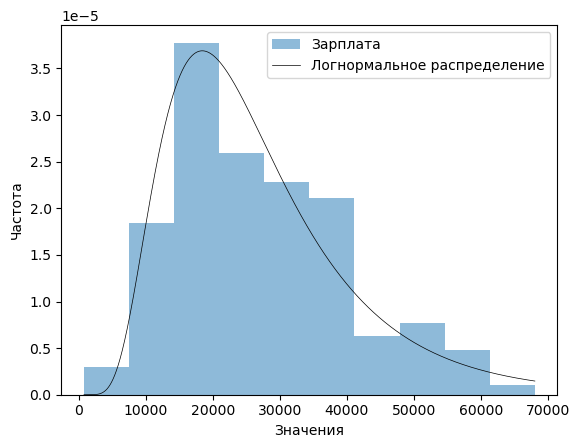

In [216]:
sal = df['yj13.2'].dropna().tolist()
sal = np.array([i for i in sal if i>0 and i <= 68000])

ln_sal = np.log(sal)
μ_hat_sal = np.mean(ln_sal)
num = (ln_sal - μ_hat_sal)**2
σ_hat_sal = (np.mean(num))**(1/2)

dist_lognorm_sal = lognorm(σ_hat_sal, scale = exp(μ_hat_sal))

x = np.arange(int(min(sal))-1, int(max(sal))+1 )
plt.hist(sal, density=True, bins=10, histtype='stepfilled', alpha=0.5, label='Зарплата')
plt.plot(x, dist_lognorm_sal.pdf(x), 'k-', lw=0.5, label='Логнормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

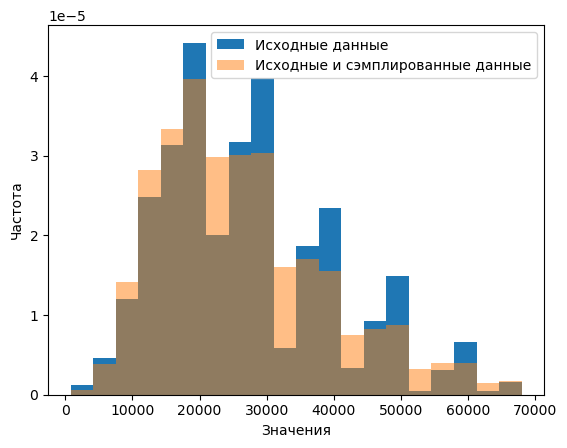

In [217]:
sal2 = np.array(df['yj13.2'].tolist())
sal2[sal2 > 68000] = 999999999
sal2[sal2 == 0] = 999999999

sal2_s = []
sal_size=np.sum(np.isnan(sal2))

while len(sal2_s) < sal_size:
    samples = np.random.lognormal(μ_hat_sal,σ_hat_sal, size=100) 
    filtered_samples = samples[(samples >= min(sal[~np.isnan(sal)]) ) & (samples <= max(sal[~np.isnan(sal)]))] 
    sal2_s.extend(filtered_samples[:sal_size - len(sal2_s)])  

sal2_s = np.array(sal2_s)
sal2[np.isnan(sal2)] = sal2_s

sal3 = sal2[sal2 != 999999999]

plt.hist(sal, density=True, bins=20, label='Исходные данные')
plt.hist(sal3, density=True, bins=20, alpha=0.5, label='Исходные и сэмплированные данные')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Удовлетворенность работой

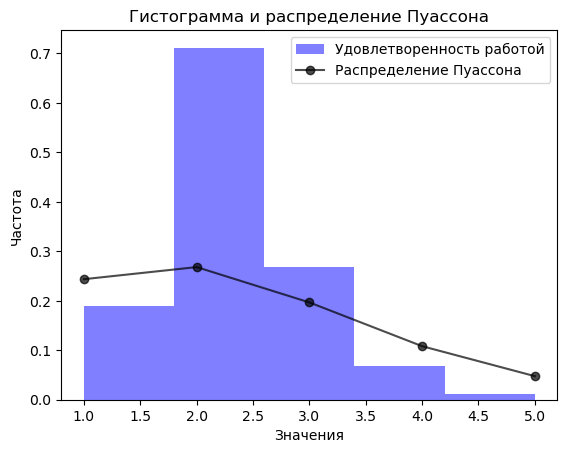

In [30]:
js = df['yj1.1.1'].dropna().tolist()
js = np.array([i for i in js if i < 99999996])

lambda_mle_js = sum(js) / len(js) 

plt.hist(js, bins=5, density=True, alpha=0.5, color='b', label='Удовлетворенность работой')
x = np.arange(1, int(max(js))+1 )
plt.plot(x, poisson.pmf(x, lambda_mle_js), color='k', marker='o', linestyle='-', alpha=0.7, label='Распределение Пуассона')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма и распределение Пуассона')
plt.legend()
plt.show()

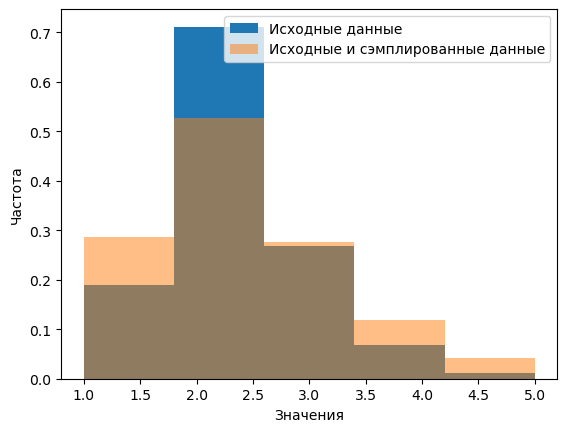

In [219]:
js2 = np.array(df['yj1.1.1'].tolist())
js2[js2 > 6] = np.nan

js2_s = []
js_size=np.sum(np.isnan(js2))

while len(js2_s) < js_size:
    samples =np.random.poisson(lambda_mle_js, size=100)
    filtered_samples = samples[(samples >= min(js[~np.isnan(js)]) ) & (samples <= max(js[~np.isnan(js)]))] 
    js2_s.extend(filtered_samples[:js_size - len(js2_s)])  
    
js2[np.isnan(js2)] = js2_s

plt.hist(js, density=True, bins=5, label='Исходные данные')
plt.hist(js2, density=True, bins=5, alpha=0.5, label='Исходные и сэмплированные данные')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Образование

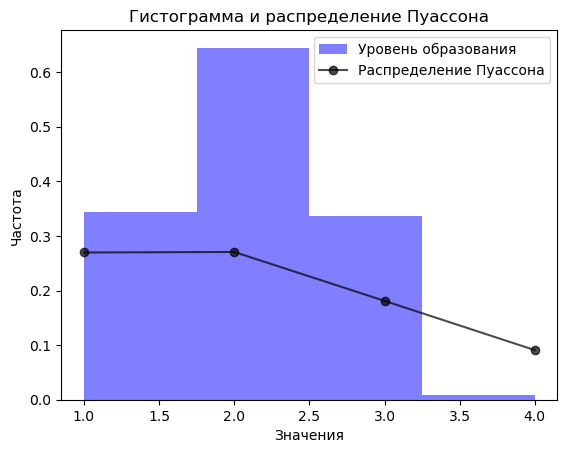

In [34]:
edu = df['yj72.18a'].dropna().tolist()
edu = [ i for i in edu if i < 18]

edu = [
    '1' if i in [1, 2] else 
    '2' if i in [3, 4, 5, 6, 15] else 
    '3' if i in [10, 11, 12] else 
    '4' if i in [16, 17,      13, 14] else 
    str(i) 
    for i in edu
]

edu = np.array([int(i) for i in edu])


lambda_mle_edu = sum(edu) / len(edu) 

plt.hist(edu, bins=4, density=True, alpha=0.5, color='b', label='Уровень образования')
x = np.arange(int(min(edu)), int(max(edu))+1 )
plt.plot(x, poisson.pmf(x, lambda_mle_edu), color='k', marker='o', linestyle='-', alpha=0.7, label='Распределение Пуассона')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма и распределение Пуассона')
plt.legend()
plt.show()



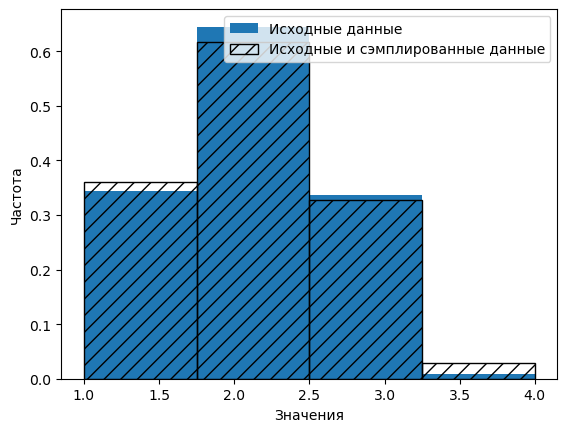

In [220]:
edu2 = np.array(df['yj72.18a'].tolist())
edu2[edu2 >17] = np.nan

edu2[(edu2 == 1) | (edu2 == 2)] = 1
edu2[(edu2 == 3) | (edu2 == 4)| (edu2 == 5)| (edu2 == 6)| (edu2 == 15)] = 2
edu2[(edu2 == 10) | (edu2 == 11)| (edu2 == 12)] = 3
edu2[(edu2 == 16) | (edu2 == 17)| (edu2 == 13)| (edu2 == 14)] = 4

edu2_s = []
edu_size=np.sum(np.isnan(edu2))

while len(edu2_s) < edu_size:
    samples =np.random.poisson(lambda_mle_edu, size=100)
    filtered_samples = samples[(samples >= min(edu[~np.isnan(edu)]) ) & (samples <= max(edu[~np.isnan(edu)]))] 
    edu2_s.extend(filtered_samples[:edu_size - len(edu2_s)])  

    
edu2[np.isnan(edu2)] = edu2_s

plt.hist(edu, density=True, bins=4, label='Исходные данные')
plt.hist(edu2, density=True, bins=4, facecolor='none', edgecolor='black', hatch='//', label='Исходные и сэмплированные данные')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [221]:
df2= df[['yj21b', 'yj6.2','yj10.2','yj13.2','yj1.1.1','yj72.18a']]

df2.loc[:, 'yj21b'] = vac2
df2.loc[:, 'yj6.2'] = ww2
df2.loc[:, 'yj10.2'] = bon2
df2.loc[:, 'yj13.2'] = sal2
df2.loc[:, 'yj1.1.1'] = js2
df2.loc[:, 'yj72.18a'] = edu2
df2 = df2[~(df2 == 999999999).any(axis=1)]

df2


,yj21b,yj6.2,yj10.2,yj13.2,yj1.1.1,yj72.18a
0,25.0,46.0,2167.424600,19743.967936,4.0,2.0
1,46.0,43.0,2034.532212,34155.762017,1.0,1.0
2,20.0,51.0,4585.387381,19196.196496,2.0,2.0
3,19.0,40.0,2706.252284,30314.891957,1.0,1.0
4,42.0,40.0,8303.526297,25000.000000,3.0,2.0
...,...,...,...,...,...,...
12114,32.0,40.0,3080.619031,57746.201637,3.0,3.0
12115,18.0,42.0,9280.643951,27245.102915,2.0,3.0
12116,14.0,50.0,2752.411221,40000.000000,2.0,2.0
12118,23.0,46.0,5486.927774,55518.027218,1.0,1.0
